# Runge-Kutta method to solve ODEs

## Problem: Block tied to a wall with a spring (no damping force)

In [55]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
import matplotlib.pyplot as plt
m = int(input('Enter the mass of the block (m)\n'))
k = int(input('Enter the spring constant (k)\n'))
w2 = k/m

Enter the mass of the block (m)
1
Enter the spring constant (k)
5


In [62]:
#Runge Kutta (fourth order) function which gives values of (i+1)th step fron ith step
def rungekutta(x, y, z, h, dydx, dzdx): 
    
    k1 = h*dydx(x, y, z) #Initial slope
    l1 = h*dzdx(x, y, z)
    k2 = h*dydx(x+h/2., y+k1/2., z+l1/2.) #Slope at midpoint
    l2 = h*dzdx(x+h/2., y+k1/2., z+l1/2.)
    k3 = h*dydx(x+h/2., y+k2/2., z+l2/2.)
    l3 = h*dzdx(x+h/2., y+k2/2., z+l2/2.)
    k4 = h*dydx(x+h, y+k3, z+l3) #Slope after step size
    l4 = h*dzdx(x+h, y+k3, z+l3)

    y = y + 1./6.*(k1+2*k2+2*k3+k4) #Values of x,v,t at i+1
    z = z + 1./6.*(l1+2*l2+2*l3+l4)
    x = x + h
    
    return x, y, z

In [63]:
def dvdt(t, v, x): #Defining functions for the two coupled first order ode's
    return -w2*x

def dxdt(t, v, x):
    return v

t0 = 0 #Initial time
v0 = 100 #Initial velocity
x0 = 5 #Initial position
dt = 0.01 #Step size
t_end = 5 #Final time

In [64]:
t_list = [t0] #List starts with initial values
v_list = [v0]
x_list = [x0]

t = t0
v = v0
x = x0

print('\n        Solution:       ')
while t <= t_end:    #Iterative scheme
    
    t, v, x = rungekutta(t, v, x, dt, dvdt, dxdt) #Calling the function for each t between t0 and t_end
    

    print('-------------------------')    
    print('t\tv\tx')
    print('-------------------------')
    print('%.4f\t%.4f\t%.4f'% (t,v,x) )
    #Making a list of the solution values
    t_list.append(t)
    v_list.append(v)
    x_list.append(x)


        Solution:       
-------------------------
t	v	x
-------------------------
0.0100	72.7188	5.8672
-------------------------
t	v	x
-------------------------
0.0200	41.8169	6.4422
-------------------------
t	v	x
-------------------------
0.0300	8.8330	6.6965
-------------------------
t	v	x
-------------------------
0.0400	-24.5906	6.6174
-------------------------
t	v	x
-------------------------
0.0500	-56.7898	6.2088
-------------------------
t	v	x
-------------------------
0.0600	-86.1614	5.4911
-------------------------
t	v	x
-------------------------
0.0700	-111.2429	4.4999
-------------------------
t	v	x
-------------------------
0.0800	-130.7856	3.2848
-------------------------
t	v	x
-------------------------
0.0900	-143.8165	1.9060
-------------------------
t	v	x
-------------------------
0.1000	-149.6868	0.4324
-------------------------
t	v	x
-------------------------
0.1100	-148.1041	-1.0628
-------------------------
t	v	x
-------------------------
0.1200	-139.1474	-2.505

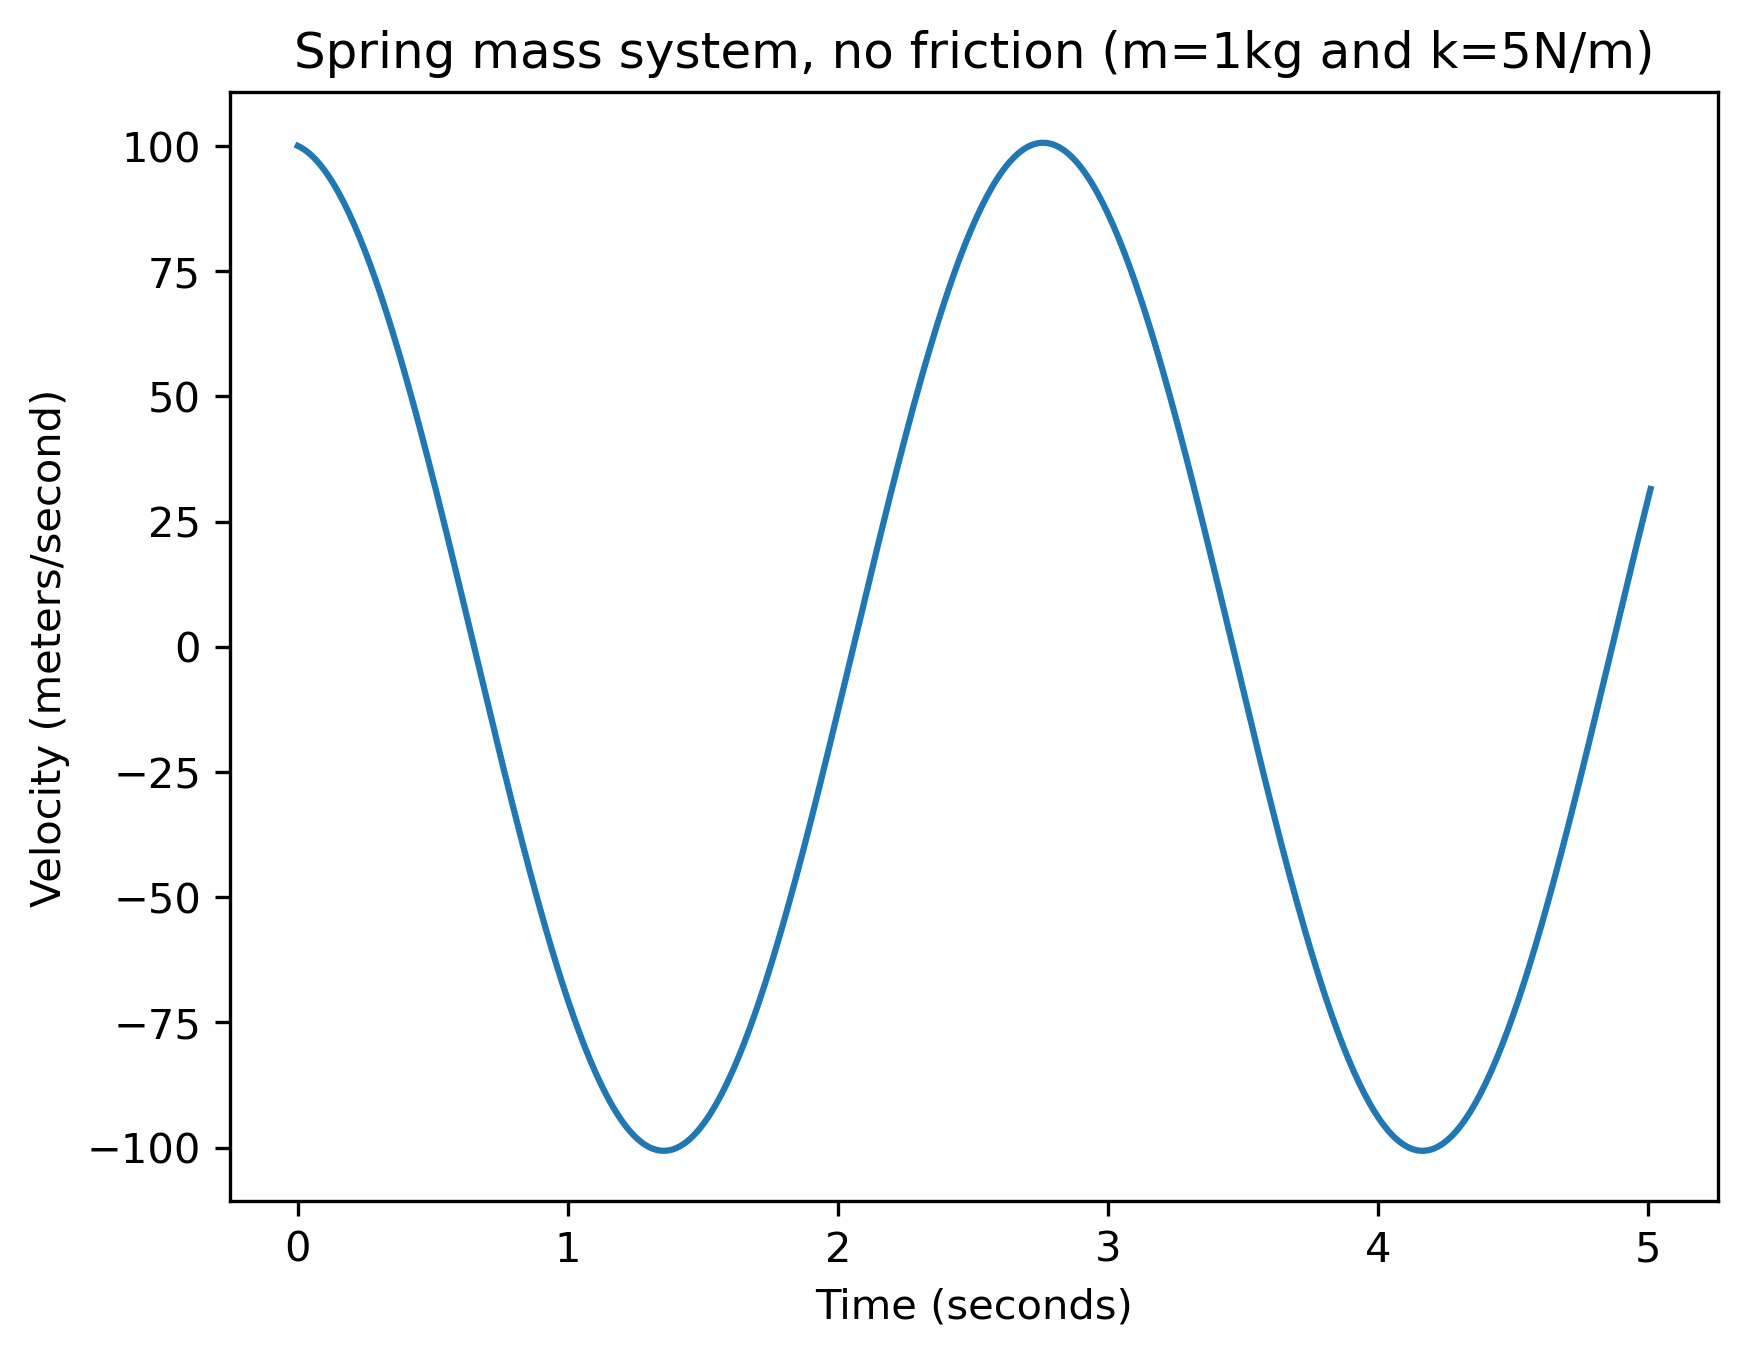

In [59]:
plt.title("Spring mass system, no friction (m=1kg and k=5N/m)")
plt.plot(t_list, v_list)
plt.xlabel("Time (seconds)")
plt.ylabel("Velocity (meters/second)")
plt.show()

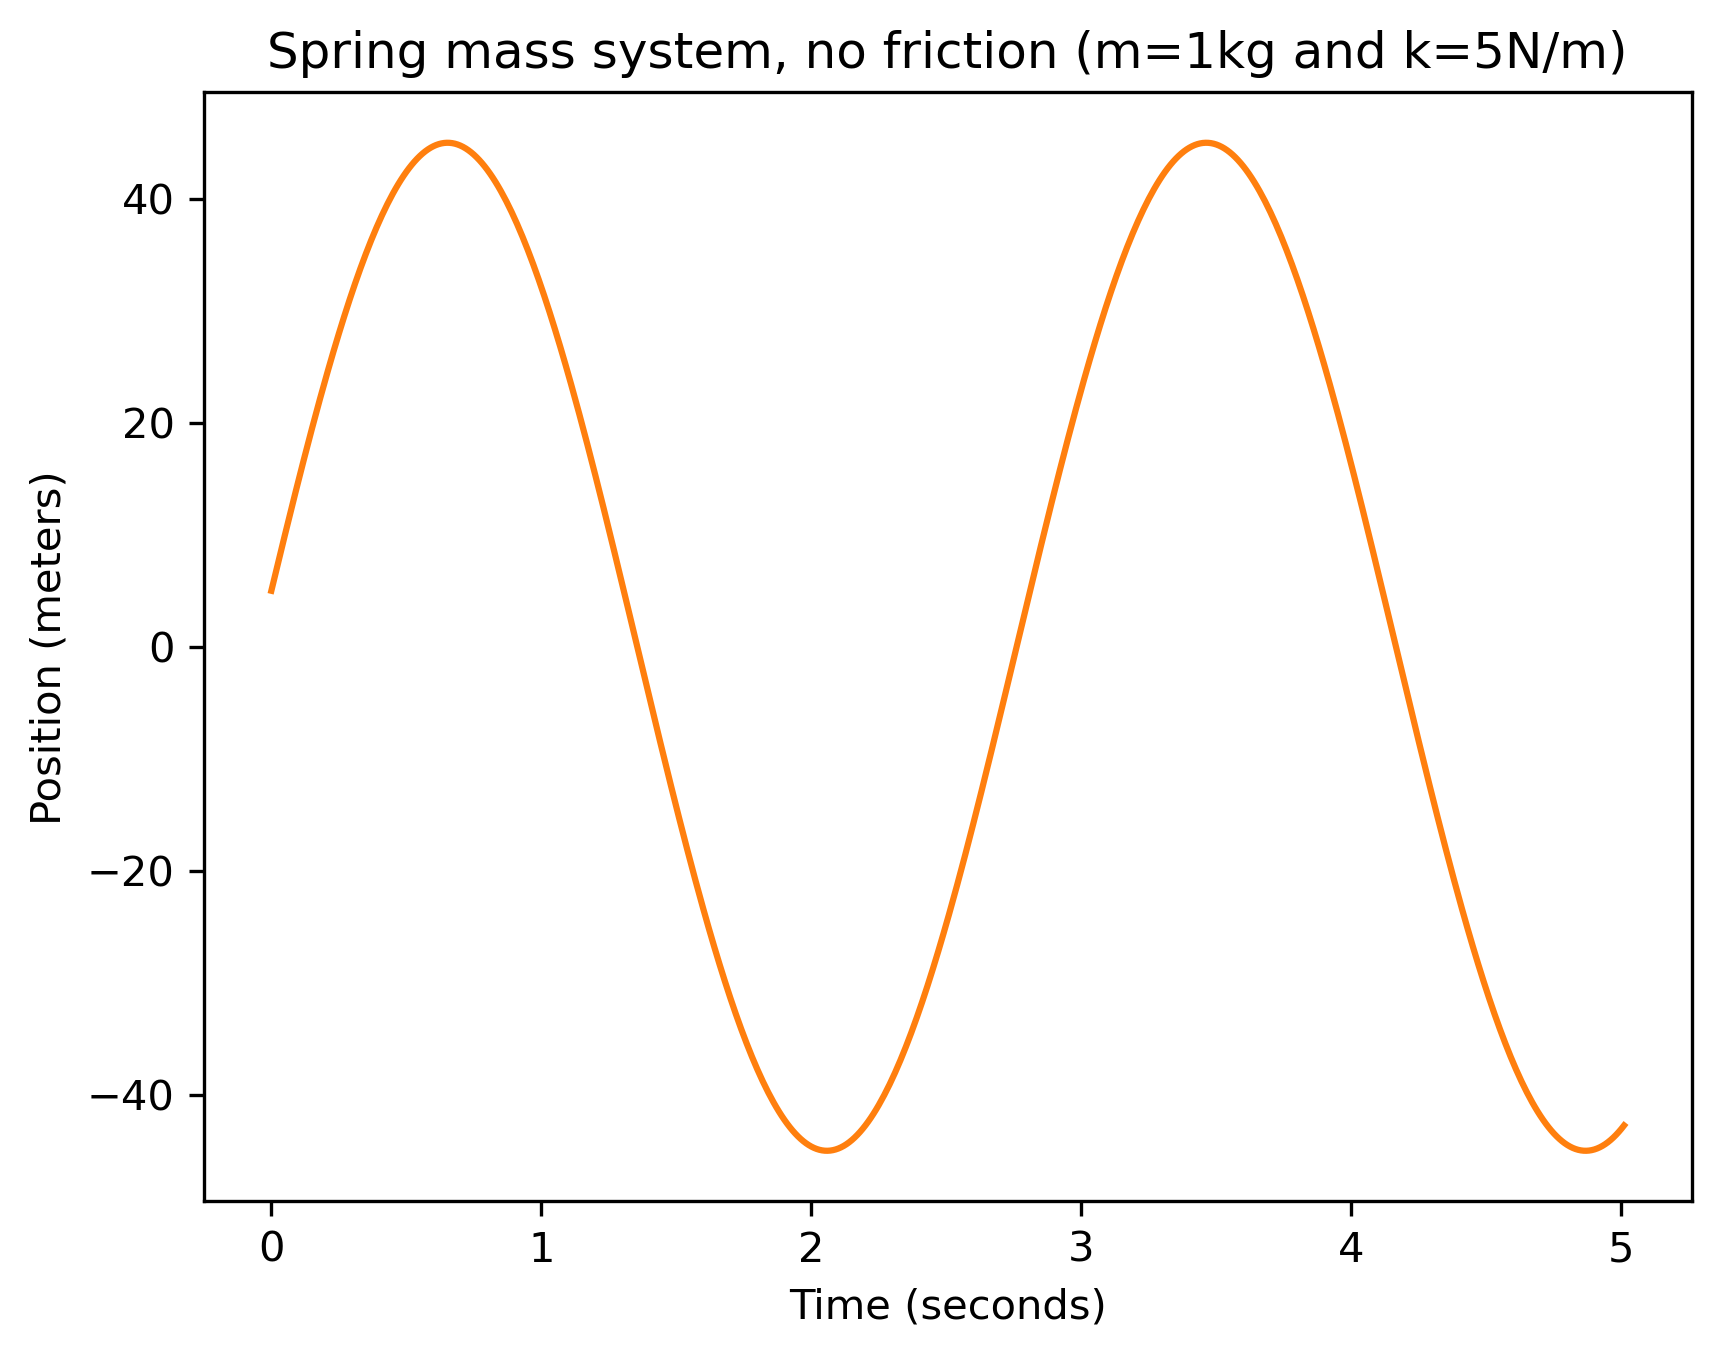

In [60]:
plt.title("Spring mass system, no friction (m=1kg and k=5N/m)")
plt.plot(t_list, x_list, c='tab:orange')
plt.xlabel("Time (seconds)")
plt.ylabel("Position (meters)")
plt.show()

## A more realistic spring contant and mass: https://physics.stackexchange.com/questions/368984/finding-the-right-spring-constant-real-world-problem#:~:text=The%20equation%20is%20F%3Dk,25%2C000N%2Fm.

In [61]:
m=50
k=25000
w2 = k/m

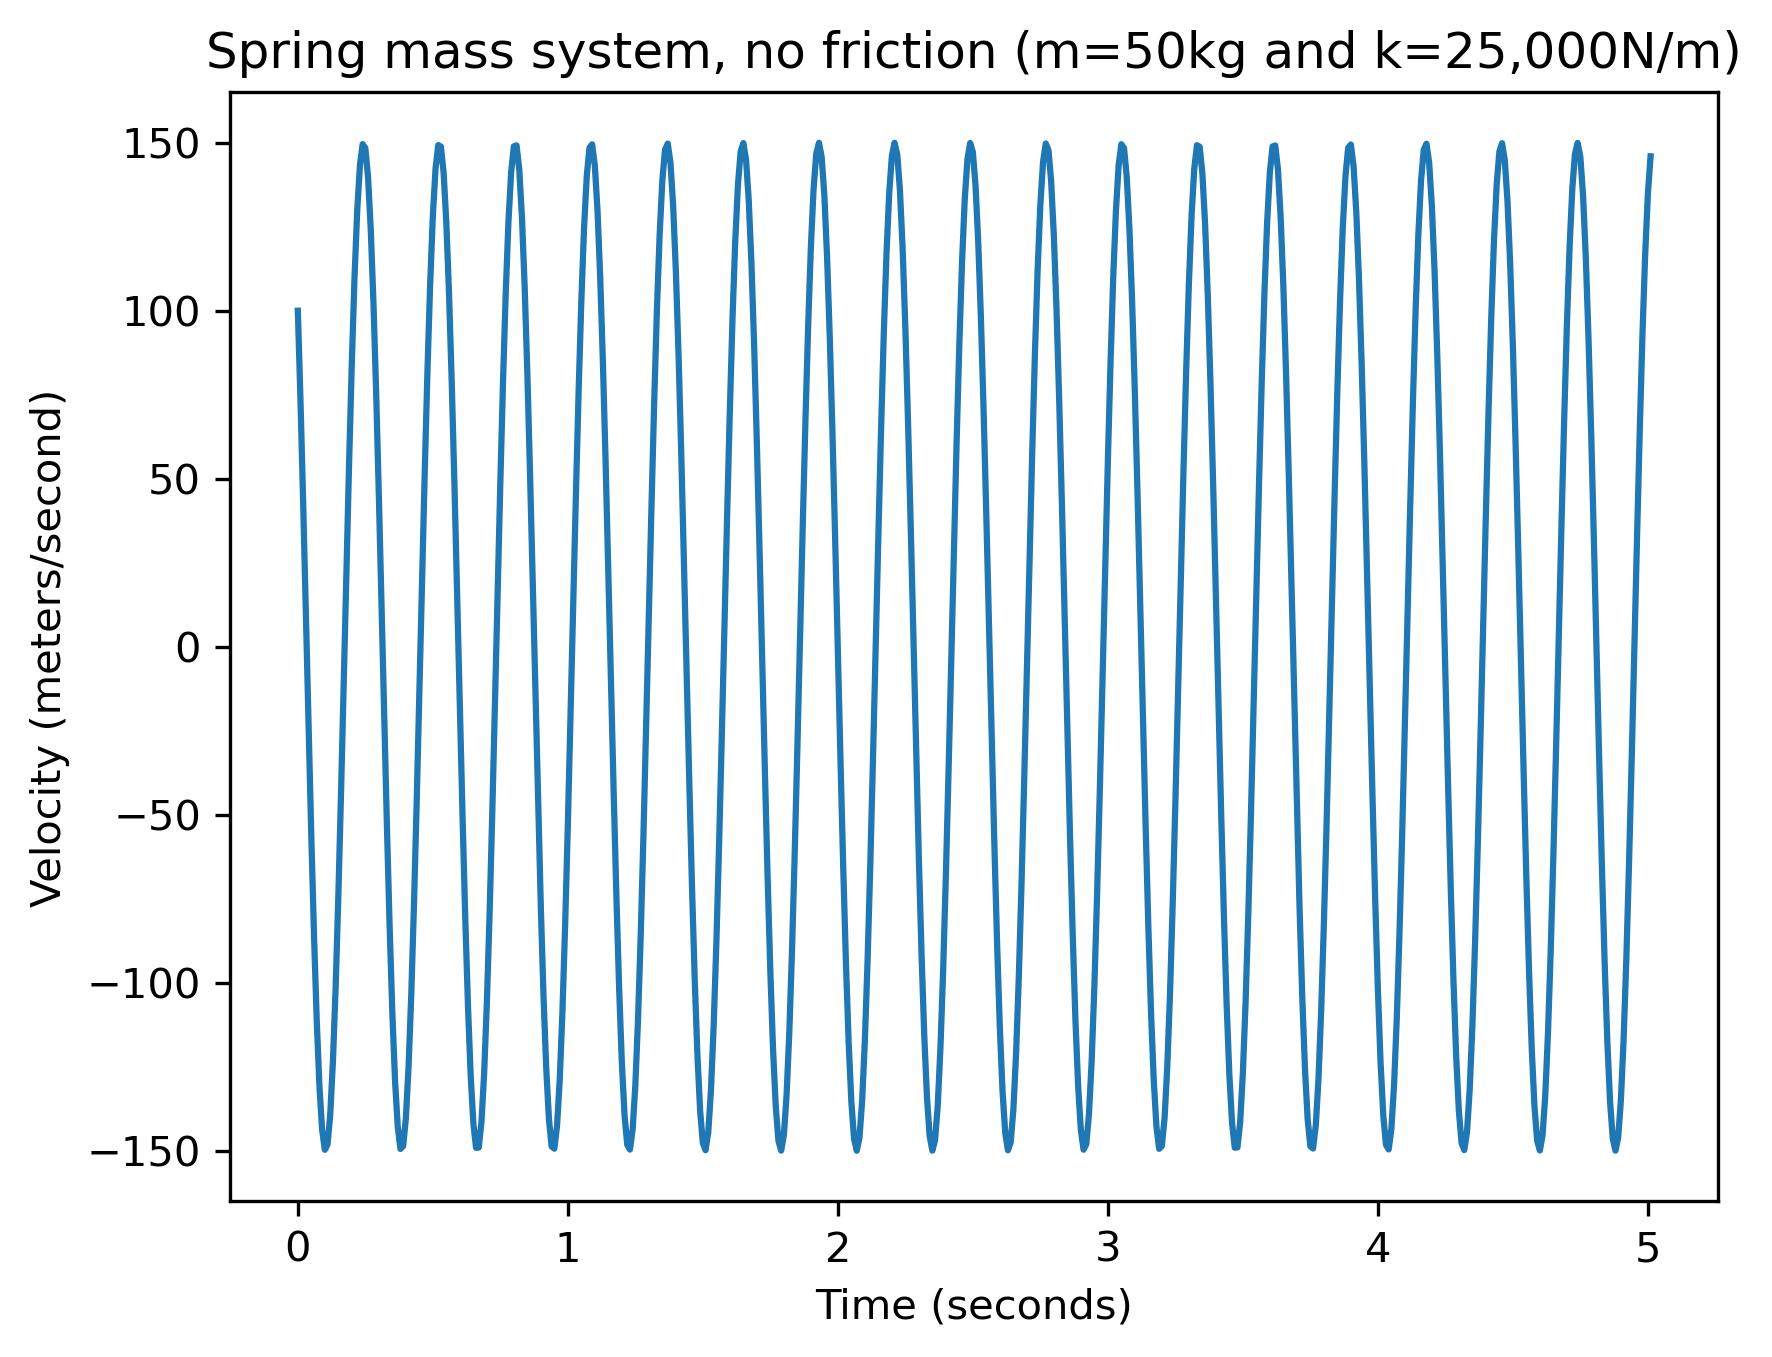

In [67]:
plt.title("Spring mass system, no friction (m=50kg and k=25,000N/m)")
plt.plot(t_list, v_list)
plt.xlabel("Time (seconds)")
plt.ylabel("Velocity (meters/second)")
plt.show()

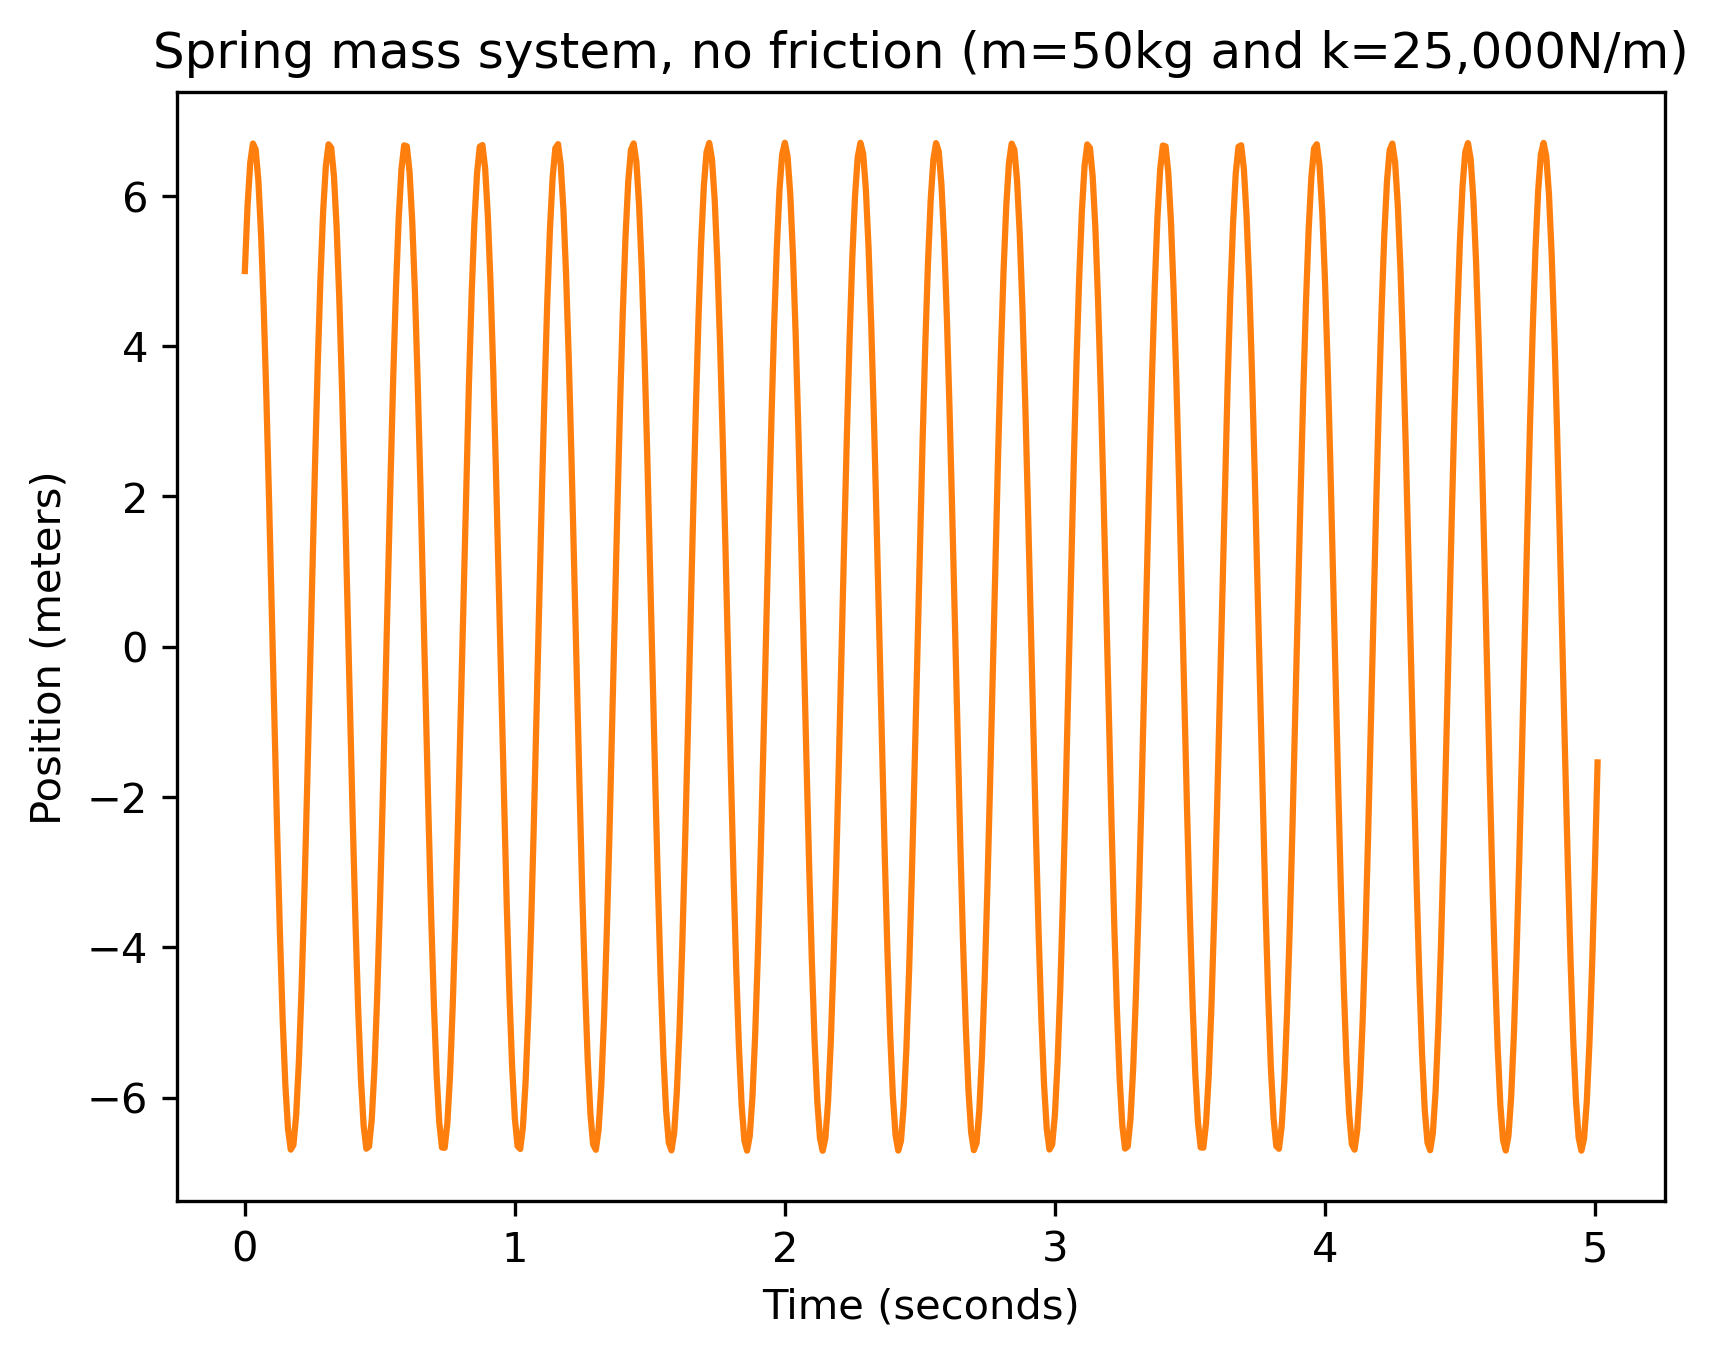

In [68]:
plt.title("Spring mass system, no friction (m=50kg and k=25,000N/m)")
plt.plot(t_list, x_list, c='tab:orange')
plt.xlabel("Time (seconds)")
plt.ylabel("Position (meters)")
plt.show()

## In this example, the frequency of oscillation is much higher hence the block changes position more number of times compared to the previous example